In [4]:
import pandas as pd
import seaborn as sns
import numpy as np
import os
from pprint import pprint
import matplotlib.pyplot as plt
pd.options.display.max_seq_items = 2000

# Read the data and get an overview

In [5]:
df = pd.read_csv("delicatessa.csv", delimiter=";")

/tmp/ipykernel_95/3706088591.py:1: DtypeWarning: Columns (5,10,13,27,37,40,41,43,48,49,52,53,59,60,68,87,88,92,96,97,98,108,109,123,125,163,189,190,210,211,239,246,268,274) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("delicatessa.csv", delimiter=";")


In [7]:
pprint(list(df.columns))

['sku',
 'categories',
 'enabled',
 'family',
 'parent',
 'groups',
 'additional_images',
 'akeneo_root_product_model_id',
 'allergy_sufferers_information',
 'all_product_types_webshop_cluster_associations',
 'application-de_CH',
 'attribute_to_trigger_processing_again',
 'basic_data_text-de_CH',
 'bio_organic_origin',
 'block_galaxus_output',
 'brand',
 'censhare_migration_sap_status',
 'censhare_migration_shop_status_string',
 'censhare_migration_style_value',
 'censhare_migration_used_to_be_price_text-de_CH',
 'censhare_migration_webshopdeaktivierung',
 'censhare_migration_webshop_strecke',
 'censhare_migration_workflow_state',
 'country_of_origin',
 'currency',
 'data_source',
 'data_source_classification',
 'data_source_information',
 'data_source_information_1',
 'data_source_information_2',
 'data_source_information_3',
 'data_source_material',
 'data_source_primary_color',
 'data_source_primary_style',
 'data_source_product_type',
 'data_source_size_model',
 'data_source_size_u

In [8]:
# get first row
pprint(list(df.iloc[0].values))

['5c0b84a240d811edb35aa6f4e721134dairflow',
 'globus_wine_delicatessa,segments',
 1,
 'delicatessa_food',
 '1ed45b21b1c869bc81545520b0a60745local',
 nan,
 '2000364608100_FE_PNG_1',
 '1ed447a18ab06480bee491b392c11a95local',
 nan,
 'wcl_wein_delicatessa,wcl_wein_delicatessa_vorraete_gewuerze,wcl_wein_delicatessa_vorraete_gewuerze_saucen',
 nan,
 nan,
 nan,
 nan,
 0,
 499.0,
 'RB',
 '{"New":false,"Newness":0,"Sale":false,"Pricehit":false,"Introduction":false,"Action":false,"Campaigns":null,"OnlineAge":0,"Historical":false,"CenshareOffline":false,"Incomplete":false,"LastPieces":false,"Bestseller":false}',
 'DEFAULT',
 nan,
 nan,
 nan,
 65.0,
 nan,
 nan,
 'censhare_migration_delicatessa',
 'globus:pim.category.delicatessa.saucen-suppen.bouillons-fonds',
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 'Glace',
 'globus:pim.product.size-model.gewicht',
 'g',
 105.0,
 nan,
 nan,
 nan,
 nan,
 'Das Geheimnis von schmackhaften Saucen liegt in der Wahl der richtigen '
 'Zutaten. Perfekte Saucen basiere

# LO1 - Visualization basics, chart types

In [9]:
df["segments"].value_counts()

seg_wine_delicatessa                                                                                        6376
seg_wine_delicatessa,seg_wine_delicatessa                                                                      5
seg_wine_delicatessa,seg_wine_delicatessa,seg_wine_delicatessa,seg_wine_delicatessa,seg_wine_delicatessa       3
seg_kitchen_table,seg_wine_delicatessa                                                                         3
seg_wine_delicatessa,seg_wine_delicatessa,seg_wine_delicatessa                                                 2
seg_home_living                                                                                                1
seg_wine_delicatessa,seg_kitchen_table                                                                         1
seg_living_travel,seg_wine_delicatessa                                                                         1
Name: segments, dtype: int64

<Axes: >

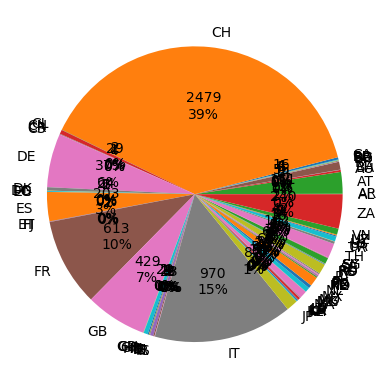

In [10]:
def label_function(val):
    return f'{val / 100 * len(df):.0f}\n{val:.0f}%'
df.groupby('origin_country').size().plot(kind='pie', autopct=label_function)

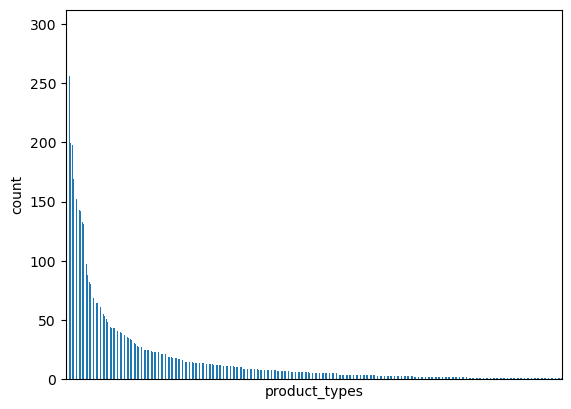

In [11]:
# plot bar from column segments
df["product_types"].value_counts().plot(kind="bar", xlabel="product_types", ylabel="count")
# dont show any label per bin
plt.xticks([])
plt.show()

In [12]:
df["product_types"].value_counts()[df["product_types"].value_counts() > 100]

pty_pastries              297
pty_ethno_food            290
pty_panel                 256
pty_gift_bag              199
pty_black_tea             198
pty_spice_mixes           169
pty_pralines              164
pty_jams                  152
pty_characters            145
pty_olive_oil             143
pty_honey                 142
pty_gift_basket           133
pty_green_tea             131
pty_baking_ingredients    106
Name: product_types, dtype: int64

In [13]:
df["origin_country"].value_counts()

CH    2473
IT     968
FR     612
GB     428
DE     374
      ... 
ET       1
RO       1
LA       1
IL       1
MK       1
Name: origin_country, Length: 74, dtype: int64

In [14]:
df_europe_codes = pd.read_csv("europe_iso_codes.csv")

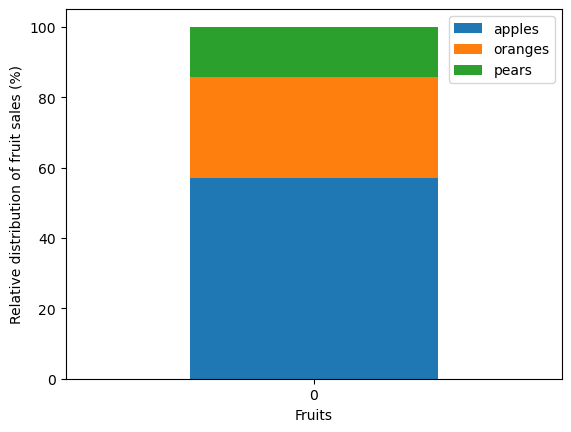

In [15]:
data = {'apples': [20],
        'oranges': [10],
        'pears': [5]}
df_dummy = pd.DataFrame(data)

df_percent = df_dummy.divide(df_dummy.sum(axis=1), axis=0) * 100

ax = df_percent.plot(kind='bar', stacked=True)
ax.set_ylabel('Relative distribution of fruit sales (%)')
ax.set_xlabel('Fruits')
plt.xticks(rotation=0)
plt.show()

In [16]:
# make a separate df with absolute and relative ocurrencies
df_origin_country = pd.DataFrame({"absolute": df["origin_country"].value_counts(), "relative": df["origin_country"].value_counts() / df["origin_country"].value_counts().sum()})
# show the df
df_origin_country

,absolute,relative
CH,2473,0.387800
IT,968,0.151796
FR,612,0.095970
GB,428,0.067116
DE,374,0.058648
...,...,...
ET,1,0.000157
RO,1,0.000157
LA,1,0.000157
IL,1,0.000157


In [17]:
# iterate through df_europe_codes, column ISO Code and change df_origin_country index to europe if it occures
for index, row in df_europe_codes.iterrows():
    if row["Country"] == "Switzerland":
        continue
    if row["ISO Code"] in df_origin_country.index:
        df_origin_country.rename(index={row["ISO Code"]: "europe"}, inplace=True)
# show the df
df_origin_country.value_counts()

absolute  relative
1         0.000157    12
2         0.000314    12
3         0.000470     5
4         0.000627     5
8         0.001255     4
9         0.001411     3
16        0.002509     3
7         0.001098     2
6         0.000941     2
23        0.003607     2
29        0.004548     2
5         0.000784     2
968       0.151796     1
81        0.012702     1
612       0.095970     1
428       0.067116     1
374       0.058648     1
239       0.037478     1
203       0.031833     1
151       0.023679     1
102       0.015995     1
41        0.006429     1
69        0.010820     1
65        0.010193     1
55        0.008625     1
51        0.007997     1
42        0.006586     1
34        0.005332     1
33        0.005175     1
24        0.003764     1
14        0.002195     1
2473      0.387800     1
dtype: int64

In [18]:
# change for df_origin_country index to rest if its not CH or not europe
for index, row in df_origin_country.iterrows():
    if index != "europe" and index != "CH":
        df_origin_country.rename(index={index: "rest"}, inplace=True)
# show the df
df_origin_country.index.unique()

Index(['CH', 'europe', 'rest'], dtype='object')

In [19]:
df_origin_country.loc["europe"]["absolute"].values

array([968, 612, 428, 374, 203, 151,  69,  65,  55,  41,  29,  24,   9,
         8,   8,   6,   5,   4,   4,   3,   3,   2,   2,   2,   2,   2,
         1,   1,   1])

In [20]:
data_origin = {
    "CH": [df_origin_country.loc["CH"]["absolute"]],
    "Europe": [sum(df_origin_country.loc["europe"]["absolute"].values)],
    "Rest of World": [sum(df_origin_country.loc["rest"]["absolute"].values)]
}
df_origin = pd.DataFrame(data_origin)

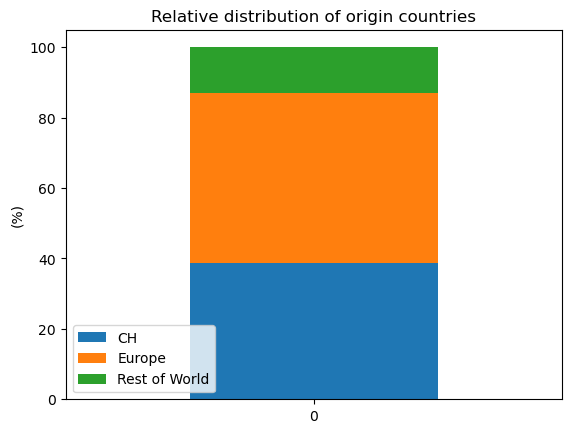

In [21]:
df_origin_rel = df_origin.divide(df_origin.sum(axis=1), axis=0) * 100
ax = df_origin_rel.plot(kind='bar', stacked=True)
ax.set_title("Relative distribution of origin countries")
ax.set_ylabel('(%)')
plt.xticks(rotation=0)
plt.show()

# LO2 - Visual Perception

<Axes: xlabel='product_types', ylabel='relative'>

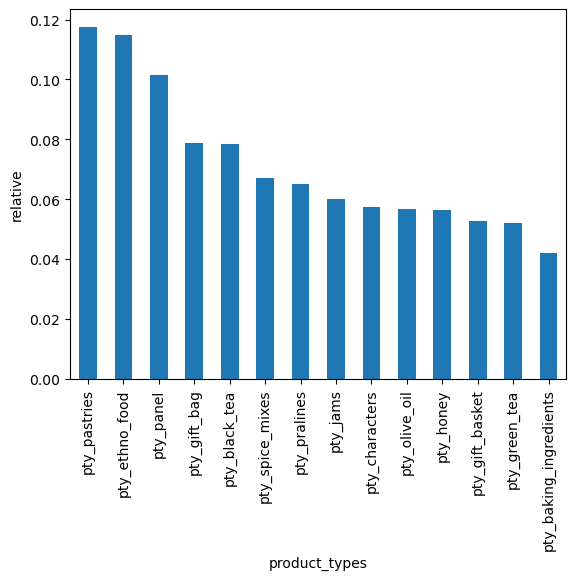

In [22]:
# PercentFormatter
from matplotlib.ticker import PercentFormatter
df["product_types"].value_counts()[df["product_types"].value_counts() > 100]
# get the relative occurence
pty_relative = df["product_types"].value_counts()[df["product_types"].value_counts() > 100] / df["product_types"].value_counts()[df["product_types"].value_counts() > 100].sum()
# plot the data
pty_relative.plot(kind="bar", xlabel="product_types", ylabel="relative")
#df["product_types"].value_counts()[df["product_types"].value_counts() > 100].plot(kind="bar", xlabel="product_types", ylabel="count")
# make relative instead of counts

In [23]:
pty_relative.index = pty_relative.index.str.replace("pty_", "")
pty_relative.index = pty_relative.index.str.replace("_", " ")
pty_relative

pastries              0.117624
ethno food            0.114851
panel                 0.101386
gift bag              0.078812
black tea             0.078416
spice mixes           0.066931
pralines              0.064950
jams                  0.060198
characters            0.057426
olive oil             0.056634
honey                 0.056238
gift basket           0.052673
green tea             0.051881
baking ingredients    0.041980
Name: product_types, dtype: float64

In [24]:
idx = pd.Index(["sweet", "ethno food", "gift", "spices", "tea", "oil"])

series = np.array([
    pty_relative["pastries"] + pty_relative["panel"] + pty_relative["pralines"] + pty_relative["jams"] + pty_relative["characters"] + pty_relative["honey"] + pty_relative["baking ingredients"],
    pty_relative["ethno food"],
    pty_relative["gift bag"] + pty_relative["gift basket"] + 0.01,
    pty_relative["spice mixes"],
    pty_relative["black tea"] + pty_relative["green tea"] - 0.01,
    pty_relative["olive oil"]
])
assert sum(series) == 1

idx_series = pd.Series(series, index=idx)
# sort
idx_series.sort_values(ascending=False, inplace=True)

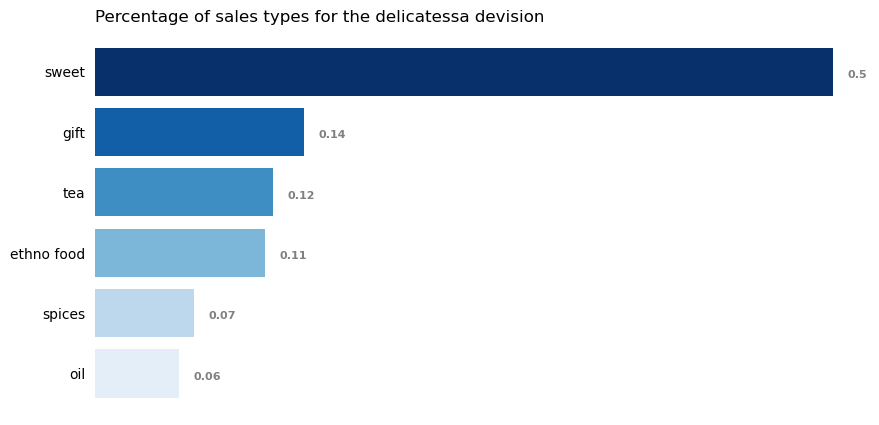

In [25]:
from matplotlib import cm
fig, ax = plt.subplots(figsize =(10, 5))
ax.barh(idx_series.index, idx_series.values, color=cm.Blues(np.linspace(1, 0.1, len(idx_series))))
# Remove axes splines
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)
# Remove x, y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
# Show top values
ax.invert_yaxis()
# Add annotation to bars
for i in ax.patches:
    plt.text(i.get_width()+0.01, i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize = 8, fontweight ='bold',
             color ='grey')
ax.set_title('Percentage of sales types for the delicatessa devision',
             loc ='left', )
# remove x labels
ax.set_xticklabels([])
plt.show()
